# We try to plot SFR, tdyn and Sig_gas from data.

In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm
import glob

In [2]:
data_home = os.path.join(home, "Data/CleanData/")

In [3]:
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
list_file

['/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi08.txt',
 '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/bouche07.txt',
 '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/genzel2010.txt',
 '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98a.txt',
 '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/tacconi13.txt',
 '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98b.txt',
 '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt']

/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi08.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/bouche07.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/genzel2010.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98a.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/tacconi13.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98b.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt
Count= 130


(-3.0, 6.5)

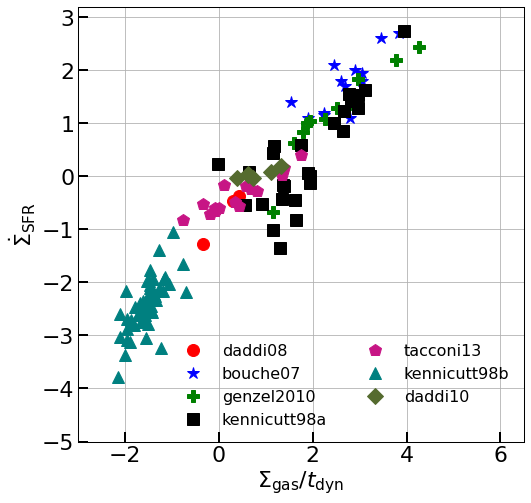

In [4]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

ls = ['o', '*', 'P', 's', 'p', '^', 'D']
color = ['red', 'blue', 'green', 'black', 'mediumvioletred', 'teal', 'darkolivegreen']
label = ['daddi08', 'bouche07', 'genzel2010', 'kennicutt98a', 'tacconi13', 'kennicutt98b', 'daddi10']
i=0
count = 0

for file in list_file:
    log_siggas = []
    log_sigSFR = []
    log_siggas_tdyn = []
    infile = open(file)
    lines = infile.readlines()
    print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            if(file == '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt'):
                siggas = np.log10(siggas)
                sigSFR = np.log10(sigSFR)
                sgastdyn = np.log10(sgastdyn)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            break
    log_siggas = np.asarray(log_siggas)
    log_sigSFR = np.asarray(log_sigSFR)
    log_siggas_tdyn = np.asarray(log_siggas_tdyn)
    count+=log_siggas.shape[0]
    
    sigSFR = 10.**log_siggas
    siggas_tdyn = 10.**log_siggas_tdyn
    
    ax.plot(log_siggas_tdyn, log_sigSFR, ls[i], color=color[i], markersize=12, label=label[i])
    i+=1
    
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylabel(r'$\dot{\Sigma}_{\rm SFR}$')
ax.set_xlabel(r'$\Sigma_{\rm gas}/t_{\rm dyn}$')
ax.legend(frameon=False,ncol=2, fontsize=16)
ax.grid()
print("Count=", count)
ax.set_ylim(-5., 3.2)
ax.set_xlim(-3., 6.5)
# plt.savefig(data_home + 'ssfr_gastdyn.jpeg', bbox_inches='tight', dpit=160)

In [5]:
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
gal_type = []
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
    print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type.append(line.split()[3])
            if(file == '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt'):
                siggas = np.log10(siggas)
                sigSFR = np.log10(sigSFR)
                sgastdyn = np.log10(sgastdyn)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            break

/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi08.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/bouche07.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/genzel2010.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98a.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/tacconi13.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98b.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt


In [6]:
log_siggas = np.asarray(log_siggas)
log_sigSFR = np.asarray(log_sigSFR)
log_siggas_tdyn = np.asarray(log_siggas_tdyn)

Text(0.5, 0, 'log($\\Sigma_{\\rm gas}/t_{\\rm dyn}$)')

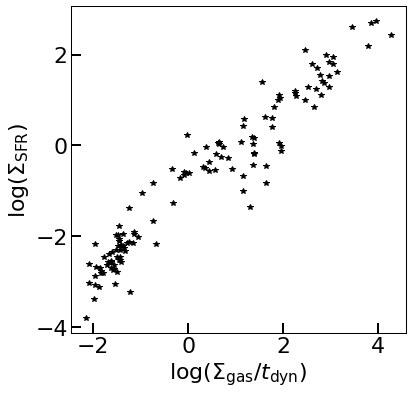

In [7]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(6, 6))

ax.plot(log_siggas_tdyn, log_sigSFR,  '*', color='black')
ax.set_ylabel(r'log($\Sigma_{\rm SFR}$)')
ax.set_xlabel(r'log($\Sigma_{\rm gas}/t_{\rm dyn}$)')

In [8]:
fg = 0.1
sigSFR = 10.**(log_sigSFR)*Msun/yr_to_sec/kpc/kpc
p_avg = 3.e3 * 1.e5
G = 6.67e-8
siggas = 10.**(log_siggas)*Msun/pc/pc
siggas_tdyn = 10.**(log_siggas_tdyn)*Msun/yr_to_sec/pc/pc/1.e6
gamma_arr = 2. * fg * sigSFR * p_avg/(math.pi * G * (siggas**2.))
gamma_arr.shape

(130,)

# Expansion Law is Fixed Area

In [18]:
122*11

1342

In [14]:

mask = (xi_arr<-4)
gal_type_num = np.zeros(len(gal_type))
gal_type_num = [1.0 if x=='Starburst' else 0 for x in gal_type]
gal_type_num = np.asarray(gal_type_num)

In [ ]:
mask = (xi_arr<-5.3) & (xi_arr>-5.4)
plt.plot(xi_arr[mask], gal_type_num[mask], 'o')
# plt.xlim(-5.4,-5.3)
gamma_arr[mask], log_sigSFR[mask], log_siggas_tdyn[mask], gal_type_num[mask],Sigma_gas[mask], tdyn[mask]

In [19]:
G0 = 1. * 9.478378378378378e-18 
xi_arr = np.log(G0/siggas_tdyn)
a = 50
Mach = 1000

dMassFluxHI = np.zeros((xi_arr.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0]))
i = j =0 
for xi in xi_arr:
    gamma = gamma_arr[i]
    xcrit = np.log(gamma)
    
    if(xcrit<0.0):
        xhigh = 1.*xcrit
        xlow  = 1.5*xcrit
    else:
        xhigh = 1.*xcrit
        xlow  = 0.5*xcrit

    Sigma0 = siggas[i]
    t0 = siggas[i]/siggas_tdyn[i]
    dMassFluxHI[i] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                        args=(gamma, t0, G0, Sigma0, Mach, 0))[0]

    dMassFluxtot[i] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                        args=(gamma, t0, G0, Sigma0, Mach, 0))[0] 

            
    i+=1
    
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fAr = 1. - dMassFlux
np.amax(FH2_fAr),np.amin(FH2_fAr)

(0.9959019484433932, 0.0)

In [ ]:
fig_path

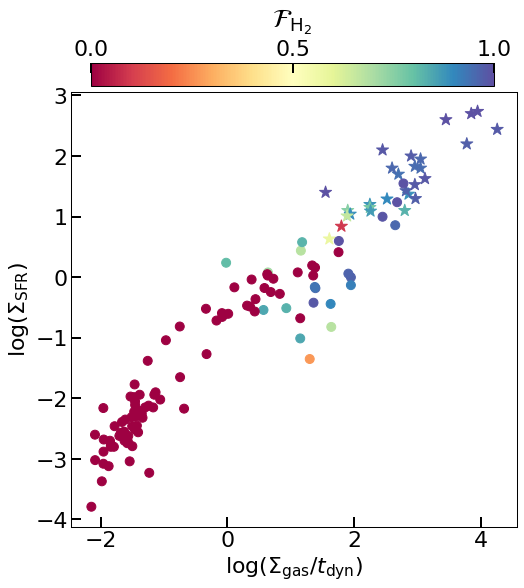

In [20]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.16
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0
cmap = 'Spectral'

mask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(log_siggas_tdyn[mask], log_sigSFR[mask], \
                            c=FH2_fAr[mask] , marker='*', cmap=cmap, vmin=0.0, vmax=1.0, s=160)

plot = ax.scatter(log_siggas_tdyn[~mask], log_sigSFR[~mask], \
                            c=FH2_fAr[~mask] , marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=80)

# plt.plot([2.45,2.45], [2.1  , 0.997], 's', color='black')

cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_ylabel(r'log($\Sigma_{\rm SFR}$)')
ax.set_xlabel(r'log($\Sigma_{\rm gas}/t_{\rm dyn}$)')
ax.text(0.45, 1.15, r"$\mathcal{F}_{\rm H_2}$", transform=ax.transAxes, fontsize=26)
save_fig = os.path.join(fig_path, 'sigSFR_sigGas.jpeg')
# plt.savefig(save_fig, bbox_inches='tight', dpi=160)

Text(0.44, 1.2, '$\\mathcal{F}_{\\rm H_2}$')

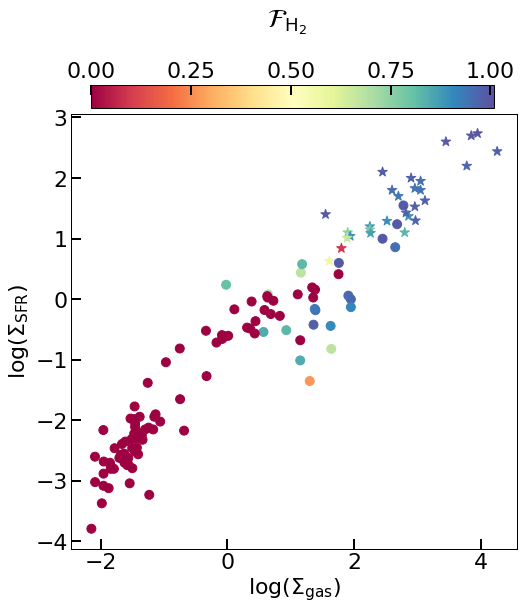

In [21]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.16
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0
cmap = 'Spectral'

pmask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(log_siggas_tdyn[mask], log_sigSFR[mask], \
                            c=FH2_fAr[mask] , marker='*', cmap=cmap, vmin=0.0, vmax=1.01, s=100)

plot = ax.scatter(log_siggas_tdyn[~mask], log_sigSFR[~mask], \
                            c=FH2_fAr[~mask] , marker='o', cmap=cmap, vmin=0.0, vmax=1.01, s=80)
cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.25, 0.5, 0.75,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_ylabel(r'log($\Sigma_{\rm SFR}$)')
ax.set_xlabel(r'log($\Sigma_{\rm gas}$)')
ax.text(0.44, 1.2, r"$\mathcal{F}_{\rm H_2}$", transform=ax.transAxes, fontsize=26)
# plt.show()

# Expansion Law is Intermediate

In [22]:
G0 = 1. * 9.478378378378378e-18 
xi_arr = np.log(G0/siggas_tdyn)
a = 50
Mach = 1000

dMassFluxHI = np.zeros((xi_arr.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0]))
i = j =0 
for xi in xi_arr:
    gamma = gamma_arr[i]
    xcrit = np.log(gamma)
    
    if(xcrit<0.0):
        xhigh = 1.*xcrit
        xlow  = 1.5*xcrit
    else:
        xhigh = 1.*xcrit
        xlow  = 0.5*xcrit

    Sigma0 = siggas[i]
    t0 = siggas[i]/siggas_tdyn[i]
    dMassFluxHI[i] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                        args=(gamma, t0, G0, Sigma0, Mach, 1))[0]

    dMassFluxtot[i] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                        args=(gamma, t0, G0, Sigma0, Mach, 1))[0] 

            
    i+=1
    
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_int = 1. - dMassFlux
np.amax(FH2_int),np.amin(FH2_int)

(0.9998968573408998, 0.0)

Text(0.4, 1.2, '$\\mathcal{F}_{\\rm H_2}^{\\rm asym}$')

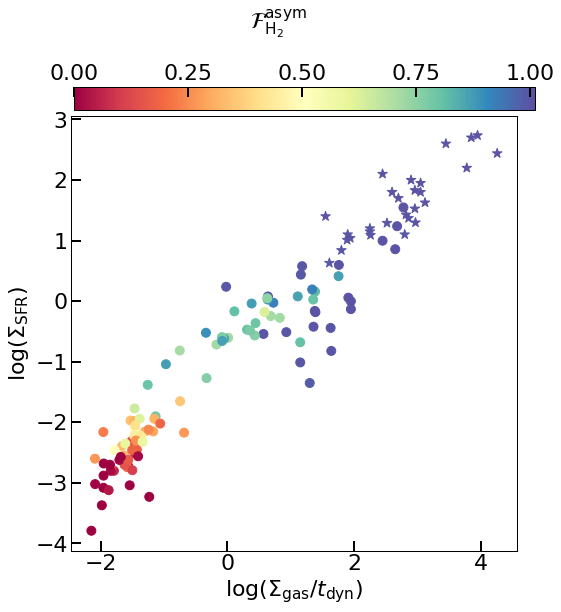

In [23]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0

cmap = 'Spectral'

mask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(log_siggas_tdyn[mask], log_sigSFR[mask], \
                            c=FH2_int[mask] , marker='*', cmap=cmap, vmin=0.0, vmax=1.01, s=100)

plot = ax.scatter(log_siggas_tdyn[~mask], log_sigSFR[~mask], \
                            c=FH2_int[~mask] , marker='o', cmap=cmap, vmin=0.0, vmax=1.01, s=80)

cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.25, 0.5, 0.75,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_ylabel(r'log($\Sigma_{\rm SFR}$)')
ax.set_xlabel(r'log($\Sigma_{\rm gas}/t_{\rm dyn}$)')
ax.text(0.4, 1.2, r"$\mathcal{F}_{\rm H_2}^{\rm asym}$", transform=ax.transAxes)
# plt.show()

# Expansion Law is Fixed Area

In [24]:
G0 = 1. * 9.478378378378378e-18 
xi_arr = np.log(G0/siggas_tdyn)
a = 50
Mach = 1000

dMassFluxHI = np.zeros((xi_arr.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0]))
i = j =0 
for xi in xi_arr:
    gamma = gamma_arr[i]
    xcrit = np.log(gamma)
    
    if(xcrit<0.0):
        xhigh = 1.*xcrit
        xlow  = 1.5*xcrit
    else:
        xhigh = 1.*xcrit
        xlow  = 0.5*xcrit

    Sigma0 = siggas[i]
    t0 = siggas[i]/siggas_tdyn[i]
    dMassFluxHI[i] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                        args=(gamma, t0, G0, Sigma0, Mach, 0))[0]

    dMassFluxtot[i] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                        args=(gamma, t0, G0, Sigma0, Mach, 0))[0] 

            
    i+=1
    
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fAr = 1. - dMassFlux
np.amax(FH2_fAr),np.amin(FH2_fAr)

(0.9959019484433932, 0.0)

Text(0.4, 1.2, '$\\mathcal{F}_{\\rm H_2}^{\\rm asym}$')

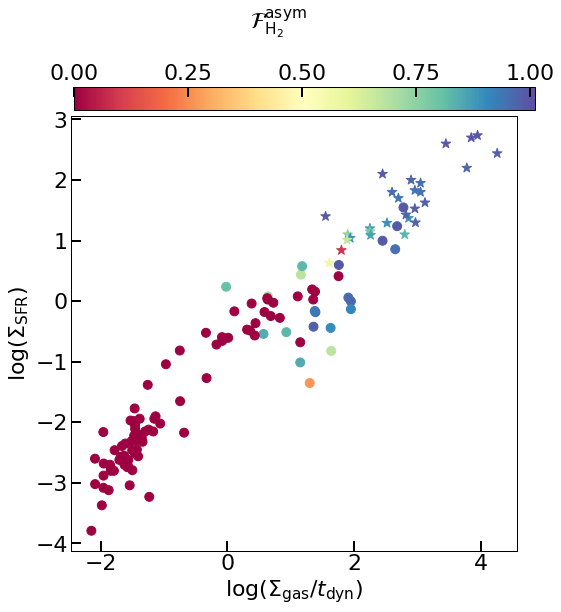

In [25]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0
cmap = 'Spectral'


mask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(log_siggas_tdyn[mask], log_sigSFR[mask], \
                            c=FH2_fAr[mask] , marker='*', cmap=cmap, vmin=0.0, vmax=1.01, s=100)

plot = ax.scatter(log_siggas_tdyn[~mask], log_sigSFR[~mask], \
                            c=FH2_fAr[~mask] , marker='o', cmap=cmap, vmin=0.0, vmax=1.01, s=80)

cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.25, 0.5, 0.75,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_ylabel(r'log($\Sigma_{\rm SFR}$)')
ax.set_xlabel(r'log($\Sigma_{\rm gas}/t_{\rm dyn}$)')
ax.text(0.4, 1.2, r"$\mathcal{F}_{\rm H_2}^{\rm asym}$", transform=ax.transAxes)
# plt.show()

# Sigma_Gas vs tdyn

In [ ]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.16
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
cmap = 'Spectral' 

Sigma_gas = 10.**log_siggas
Sigma_gas_tdyn = 10.**log_siggas_tdyn

tdyn = Sigma_gas/Sigma_gas_tdyn
mask = np.array(['Starburst' in s for s in gal_type])



plot = ax.scatter(tdyn[mask], Sigma_gas[mask], \
                            c=FH2_fAr[mask] , marker='*', cmap=cmap, vmin=0.0, vmax=1.01, s=160)

plot = ax.scatter(tdyn[~mask], Sigma_gas[~mask], \
                            c=FH2_fAr[~mask] , marker='o', cmap=cmap, vmin=0.0, vmax=1.01, s=80)

yy = np.log10(tdyn) * (-2.5) + 6.
# ax.plot(tdyn, 10.**yy, color='lightcoral', ls ='-', label = r'$\Sigma_{gas} \propto t_{\rm dyn}^{-2.5}$')
yy = np.log10(tdyn) * (-2.) + 6.5
# ax.plot(tdyn, 10.**yy, color='blue')

# plt.plot([5.62341325, 1.41253754], [1584.89319246,  398.10717055], 's', color='black')

cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.25, 0.5, 0.75,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_xlabel(r'$t_{\rm dyn}$ [Myr]')
ax.set_ylabel(r'$\Sigma_{\rm gas}$ [M$_{\odot}$ pc$^{-2}$]')
ax.set_ylim(1., 5.e4)
ax.set_xlim(0.8, 2.e3)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.legend()
ax.text(0.45, 1.2, r"$\mathcal{F}_{\rm H_2}$", transform=ax.transAxes, fontsize=26)
save_fig = os.path.join(fig_path, 'siggas_vs_tdyn.jpeg')
plt.savefig(save_fig, bbox_inches='tight', dpi=160)

# Sigma_SFR vs tdyn

In [ ]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0
cmap = 'Spectral'


mask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(tdyn[mask],10.** log_sigSFR[mask], \
                            c=FH2_fSA[mask] , marker='*', cmap=cmap, vmin=0.0, vmax=1.01, s=100)

plot = ax.scatter(tdyn[~mask],10.** log_sigSFR[~mask], \
                            c=FH2_fSA[~mask] , marker='o', cmap=cmap, vmin=0.0, vmax=1.01, s=80)

cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.25, 0.5, 0.75,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_ylabel(r'log($\Sigma_{\rm SFR}$)')
ax.set_xlabel(r'log($t_{\rm dyn}$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.text(0.4, 1.2, r"$\mathcal{F}_{\rm H_2}^{\rm asym}$", transform=ax.transAxes)
# plt.show()